# K-Means and VQ
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **K-Means clustering** algorithm
- play with the hyperparameter K 
- implement the Vector Quantization with K-Means

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked.

In [7]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from random import sample
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run your k-means algorithm on `kmeans_data.mat`. Note that the lines indicate the iterations of centroids.

In [11]:
from kmeans import kmeans
from kmeans_plot import kmeans_plot
x = sio.loadmat('kmeans_data.mat')['X']
k = 2  # modify if you want

In [5]:
def distSquared(point1, point2):
    assert point1.shape == point2.shape
    return np.sum(np.square(point1- point2))

In [9]:
def chooseKRandomCentroids(X, K):
    rand_indices = sample(range(0, X.shape[0]), K)
    return np.array([X[i] for i in rand_indices])

In [70]:
def findClosestCentroids(X, centroids):
    """
    Function takes in the (N,P) X matrix
    (where N is the # of points, P is # of features per point)
    and the (K,P) centroid seed matrix
    (where K is the # of centroids (clusters)
    and returns a (N,1) vector of cluster indices 
    per point in X (0 through K-1)
    """
    idxs = []
    
    for i in range(X.shape[0]):
        
        mindist, idx  = 1e8, 0
        for k in range(centroids.shape[0]):
            dist = distSquared(X[i], centroids[k])
            if dist < mindist:
                mindist = dist
                idx = k
        idxs.append(idx)
    return idxs

In [71]:
initial_centroid = chooseKRandomCentroids(x, k)
idxs = findClosestCentroids(x, initial_centroid)

In [73]:
def computeCentroids(X, idxs, K):
    """
    Function takes in the X matrix and the index vector
    and computes a new centroid matrix.
    """
    subX = []
    for k in range(K):
        subX.append(np.array([X[i] for i in range(X.shape[0]) if idxs[i] == k]))
    return np.array([np.mean(thisX, axis=0) for thisX in subX])

In [76]:
def kmeans(x, k):
    '''
    KMEANS K-Means clustering algorithm

        Input:  x - data point features, n-by-p maxtirx.
                k - the number of clusters

        OUTPUT: idx  - cluster label
                ctrs - cluster centers, K-by-p matrix.
                iter_ctrs - cluster centers of each iteration, (iter, k, p)
                        3D matrix.
    '''
    # YOUR CODE HERE

    # begin answer
    n_iters = 10
    initial_centroids = chooseKRandomCentroids(x, k)
    idx = findClosestCentroids(x, initial_centroids)
    ctrs = computeCentroids(x, idx, k)
    iter_ctrs = np.expand_dims(ctrs, axis=0)
    for iters in range(1, n_iters):
        idx = findClosestCentroids(x, ctrs)
        ctrs = computeCentroids(x, idx, k)
        iter_ctrs = np.vstack((iter_ctrs, np.expand_dims(ctrs, axis=0)))
    # end answer
    return idx, ctrs, iter_ctrs

In [77]:
idx, ctrs, iter_ctrs = kmeans(x, k)

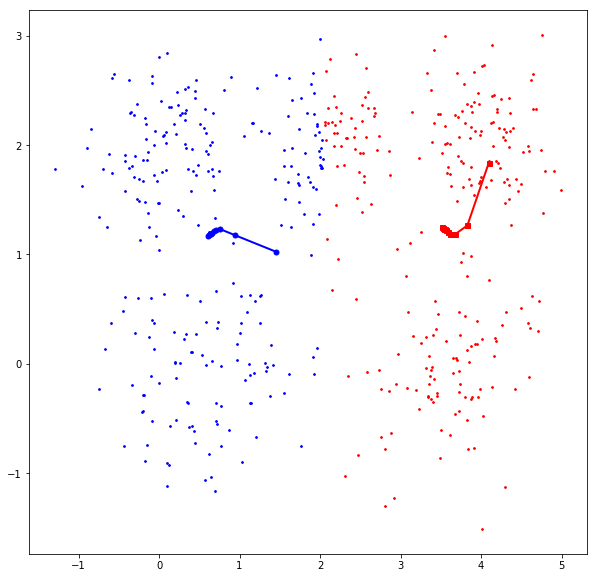

In [79]:
kmeans_plot(x, idx, ctrs, iter_ctrs)

Run your k-means algorithm on the digit dataset `digit_data.mat`. 

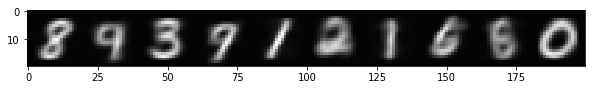

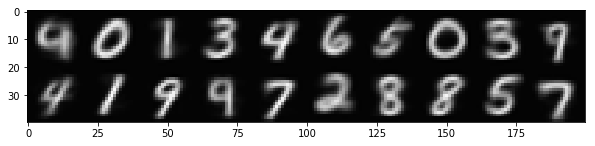

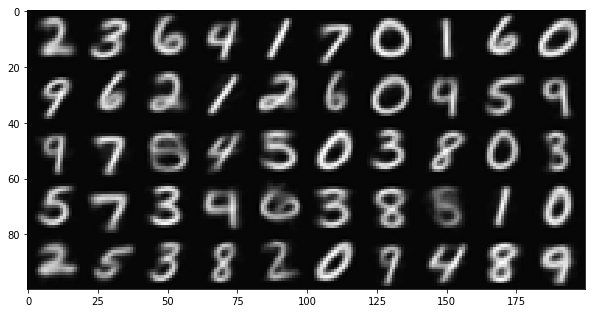

In [80]:
from show_digit import show_digit
x = sio.loadmat('digit_data.mat')['X']
for k in [10, 20, 50]:
    _, ctrs, _ = kmeans(x, k)
    show_digit(ctrs)

# Vector quantization
Compress images with K set to 8, 16, 32 and 64.

In [ ]:
import kmeans
from matplotlib.pyplot import imread
img = imread('sample1.jpg')
fea = img.reshape((img.shape[0]*img.shape[1], 3)).astype(np.float64)
# YOUR (SEVERAL LINES) CODE HERE
# begin answer
# end answer

plt.imshow(fea.reshape(img.shape).astype(np.uint8))
